In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
# Generate a sample time series with a datetime index
dates = pd.date_range(start='2013-01-01', end='2017-01-01', freq='D')
values = np.random.rand(len(dates))
df = pd.DataFrame({'humidity': values}, index=dates)

In [4]:
# Perform additive decomposition
decomposition_add = sm.tsa.seasonal_decompose(df['humidity'], model='additive')

In [5]:
# Access the trend, seasonal, and residual components
trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

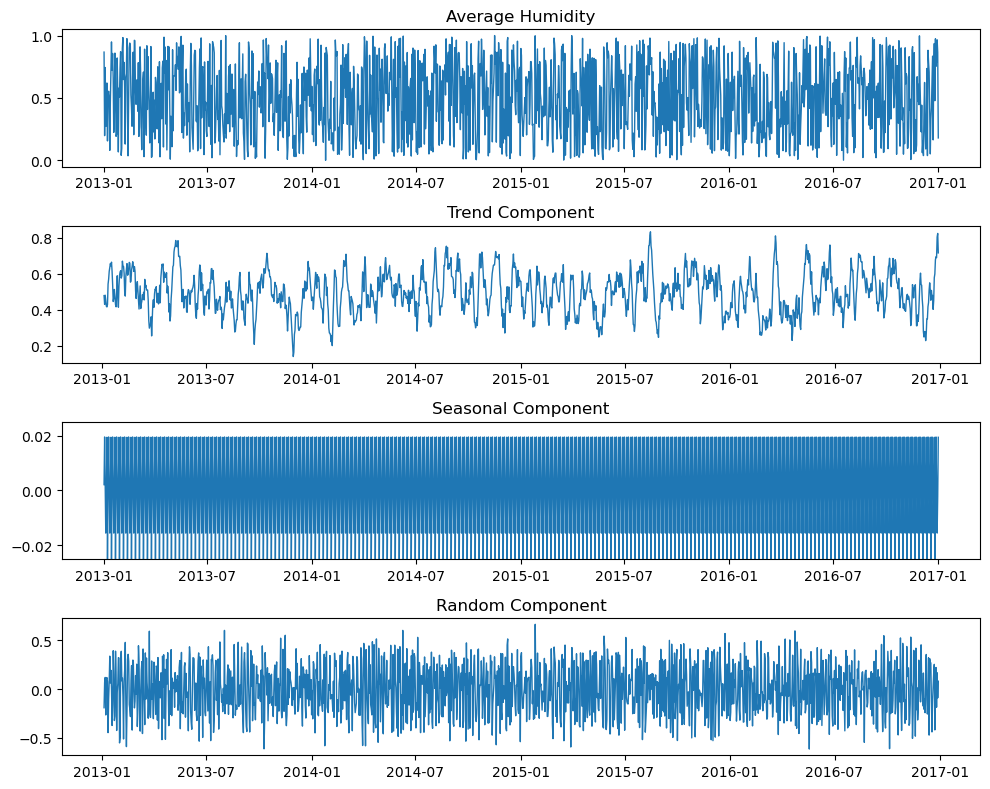

In [6]:
# plot the additive decomposition
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(df['humidity'],linewidth=1)
plt.title('Average Humidity')

# Trend component
plt.subplot(412)
plt.plot(trend_add, linewidth=1)
plt.title('Trend Component')

# Seasonal component
plt.subplot(413)
plt.plot(seasonal_add,linewidth=1)
plt.ylim(-0.025, 0.025)  
plt.title('Seasonal Component')

# Residual component
plt.subplot(414)
plt.plot(residual_add, linewidth=1)
plt.title('Random Component')

plt.tight_layout()
plt.show()

In [7]:
# Perform multiplicative decomposition
decomposition_mult = sm.tsa.seasonal_decompose(df['humidity'], model='multiplicative')

In [8]:
# Access the trend, seasonal, and residual components
trend_mult = decomposition_mult.trend
seasonal_mult = decomposition_mult.seasonal
residual_mult = decomposition_mult.resid

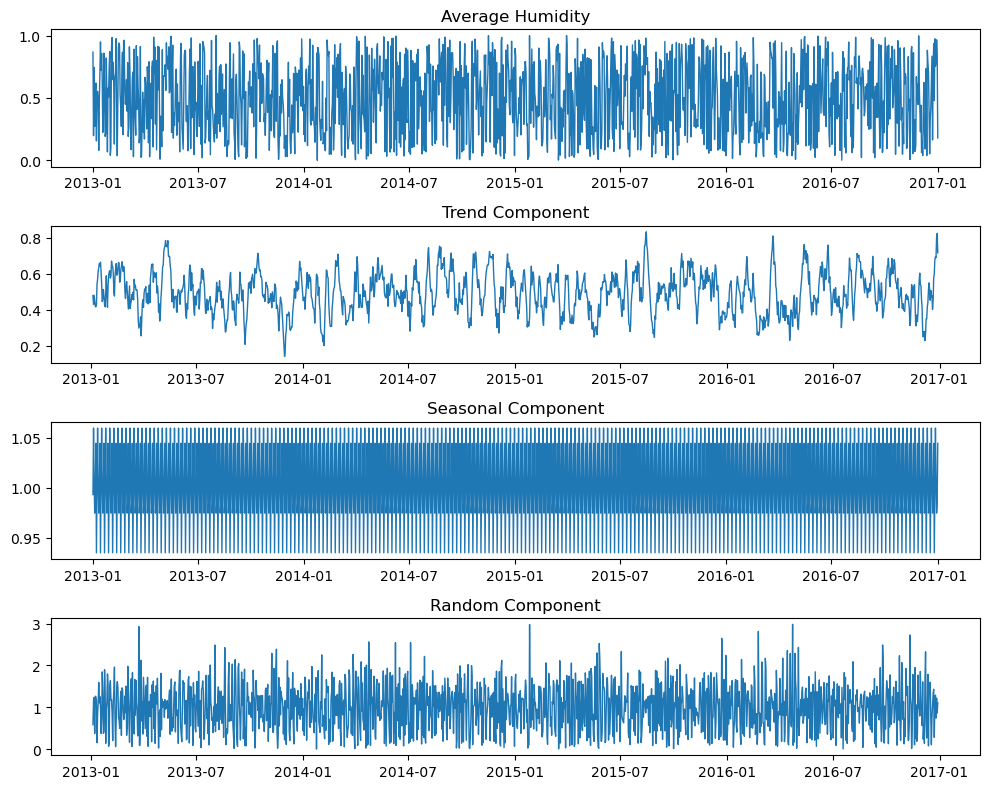

In [9]:
# Plot the multiplicative decomposition components
plt.figure(figsize=(10, 8))

# Original time series
plt.subplot(411)
plt.plot(df['humidity'],linewidth=1)
plt.title('Average Humidity')

# Trend component
plt.subplot(412)
plt.plot(trend_mult,linewidth=1)
plt.title('Trend Component')

# Seasonal component
plt.subplot(413)
plt.plot(seasonal_mult,linewidth=1)
plt.title('Seasonal Component')

# Residual component
plt.subplot(414)
plt.plot(residual_mult,linewidth=1)
plt.title('Random Component')

plt.tight_layout()
plt.show()

In [16]:

# Perform additive decomposition
decomposition_add = sm.tsa.seasonal_decompose(df['humidity'], model='additive')

# Access the trend, seasonal, and residual components
trend_add = decomposition_add.trend
seasonal_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

# Reconstruct the time series from the additive decomposition
reconstructed_add = trend_add + seasonal_add + residual_add

# Calculate Mean Squared Error (MSE)
mse_add = np.mean((df['humidity'] - reconstructed_add) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse_add = np.sqrt(mse_add)

# Perform multiplicative decomposition
decomposition_mult = sm.tsa.seasonal_decompose(df['humidity'], model='multiplicative')

# Access the trend, seasonal, and residual components
trend_mult = decomposition_mult.trend
seasonal_mult = decomposition_mult.seasonal
residual_mult = decomposition_mult.resid

# Reconstruct the time series from the multiplicative decomposition
reconstructed_mult = trend_mult * seasonal_mult * residual_mult

# Calculate Mean Squared Error (MSE)
mse_mult = np.mean((df['humidity'] - reconstructed_mult) ** 2)

# Calculate Root Mean Squared Error (RMSE)
rmse_mult = np.sqrt(mse_mult)

# Print the MSE and RMSE for both decomposition methods
print("Additive Decomposition:")
print("MSE:", mse_add)
print("RMSE:", rmse_add)

print("\nMultiplicative Decomposition:")
print("MSE:", mse_mult)
print("RMSE:", rmse_mult)

Additive Decomposition:
MSE: 5.456360591069607e-34
RMSE: 2.335885397674639e-17

Multiplicative Decomposition:
MSE: 2.593887727657608e-33
RMSE: 5.0930224107671154e-17
